# Assignment #6

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed script, renamed as

`assignment6_<username>.py`

with your `<username>` being your DataVU login name (e.g., mine is `kgoebber`) to `/archive/courses/met290/assignment6` via the Linux computing system.

**DUE DATE: 19 November 2021 at 4 pm.**

Prior to turning in your script, please cleanup and comment your code for each problem. Be sure that your output is self-describing.

In [1]:
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Question #1
Climo graph of maximum temperature and accumulated precipitation for San Fransisco, CA (`sfothr`), Chicago, IL (`ordthr`), and New York City, NY (`nycthr`).

Data Link: http://data.rcc-acis.org/StnData?sid=ordthr&sdate=por&edate=por&elems=mint,avgt,maxt,pcpn,snow,snwd&output=csv

Change the sid for each city...the above example is set for Chicago, IL with `sid=ordthr`.

For each city...
1. Create a 30 year mean (using data from 1 January 1991 to 31 December 2010) for each day (using Pandas groupby method) for the maximum temperature and precipitation.
2. Tansform the 30-year mean accumulated precipitation into a cumulative sum of precipitation (e.g., adding all of the previous days of the year precipitation to the current day so that at the last day of the year reflects the total accumulated precipitation for that time period).
3. Subset and create a new variable that contains the temperature data for 2021.
4. Subset and create a new variable that contains the acuumulated precipitation data for 2021.
5. Plot the 30-year mean temperature average along with the data for 2021 on a single axes. Set your x-axis values to be Julian day of the year (e.g., 1-366)
6. Plot the 30-year mean accumulated precipitation along with the data for 2021 on a second axes. Again set your x-axis values to be Julian day of the year (e.g., 1-366).
7. Appropriately title, label, and have good plot aesthetics for your figure.
8. Save your figure with an appropriate name.

**Submit this assignment as a Python script called `assignment6_<username>.py`, which will be run to grade your assignment. Any script that runs with an error will be marked off 25%.**

Notes:
* You should have three separate figures at the end, one for each city. Each figure should have two axes, one plotting temperature data, the other plotting precipitation data.
* Use appropriate colors for all plot characteristics.

In [2]:
def climo_plot(station, year):
    df = pd.read_csv(f'http://data.rcc-acis.org/StnData?sid={station}&sdate=por&edate=por'
                     '&elems=mint,avgt,maxt,pcpn,snow,snwd&output=csv', skiprows=1, header=None,
                     names=['date', 'minT', 'avgT', 'maxT', 'precip', 'snow', 'snowdepth'], na_values=['M'],
                     parse_dates=['date'], index_col='date')
    df = df.replace('T', .0001).astype(np.float64)

    df_30 = df[datetime(1991, 1, 1):datetime(2020, 12, 31)]

    gb = df_30.groupby([df_30.index.month, df_30.index.day])
    maxT_30_mean = gb.maxT.mean()
    precip_30_mean = gb.precip.mean()

    if year == datetime.utcnow().year:
        maxT_year = df[datetime(year, 1, 1):].maxT
        precip_year = df[datetime(year, 1, 1):].precip
    else:
        maxT_year = df[datetime(year, 1, 1):datetime(year, 12, 31)].maxT
        precip_year = df[datetime(year, 1, 1):datetime(year, 12, 31)].precip

    plt.figure(figsize=(10, 12))
    ax = plt.subplot(211)

    ax.plot(range(1, 367), maxT_30_mean, color='grey', label='1991-2020 LTM MaxT')
    ax.plot(range(1, maxT_year.size+1), maxT_year, color='tab:red', label=f'{year} MaxT')
    ax.fill_between(range(1, maxT_year.size+1), maxT_30_mean[:maxT_year.size], maxT_year,
                    where=maxT_30_mean[:maxT_year.size].values>maxT_year.values, alpha=0.75, color='tab:blue')
    ax.fill_between(range(1, maxT_year.size+1), maxT_30_mean[:maxT_year.size], maxT_year,
                    where=maxT_30_mean[:maxT_year.size].values<maxT_year.values, alpha=0.75, color='tab:red')

    ax.legend()
    ax.set_title(f'Maximum Temperature Climatology (LTM: 1991-2020) for {station[:3].upper()}')
    ax.set_ylabel('Temperature (F)')
    ax.set_xlabel('Julian Day of Year')
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_major_locator(fmt_month)
    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.grid(linestyle='dotted')

    ax2 = plt.subplot(212)
    ax2.plot(range(1, 367), precip_30_mean.cumsum(), color='grey', label='1991-2020 LTM Precipitation')
    ax2.plot(range(1, precip_year.size+1), precip_year.cumsum(), color='green', label=f'{year} Precipitation')
    ax2.fill_between(range(1, precip_year.size+1), precip_year.cumsum(), color='lightgreen')
    ax2.fill_between(range(1, precip_year.size+1), precip_30_mean[:precip_year.size].cumsum(), precip_year.cumsum(),
                     where=precip_30_mean[:precip_year.size].values.cumsum()>precip_year.values.cumsum(), alpha=0.75, color='tab:brown')
    ax2.fill_between(range(1, precip_year.size+1), precip_30_mean[:precip_year.size].cumsum(), precip_year.cumsum(),
                     where=precip_30_mean[:precip_year.size].values.cumsum()<precip_year.values.cumsum(), alpha=0.75, color='tab:green')
    

    ax2.legend()
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax2.xaxis.set_major_locator(fmt_month)
    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax2.set_title(f'Accumulated Precipitation Climatology (LTM: 1991-2020) for {station[:3].upper()}')
    ax2.set_ylabel('Precipitation (in)')
    ax2.set_xlabel('Julian Day of Year')
    ax2.grid(linestyle='dotted')
    
    plt.savefig(f'{station[:3].upper()}_climograph_{year}.png', dpi=150, bbox_inches='tight')

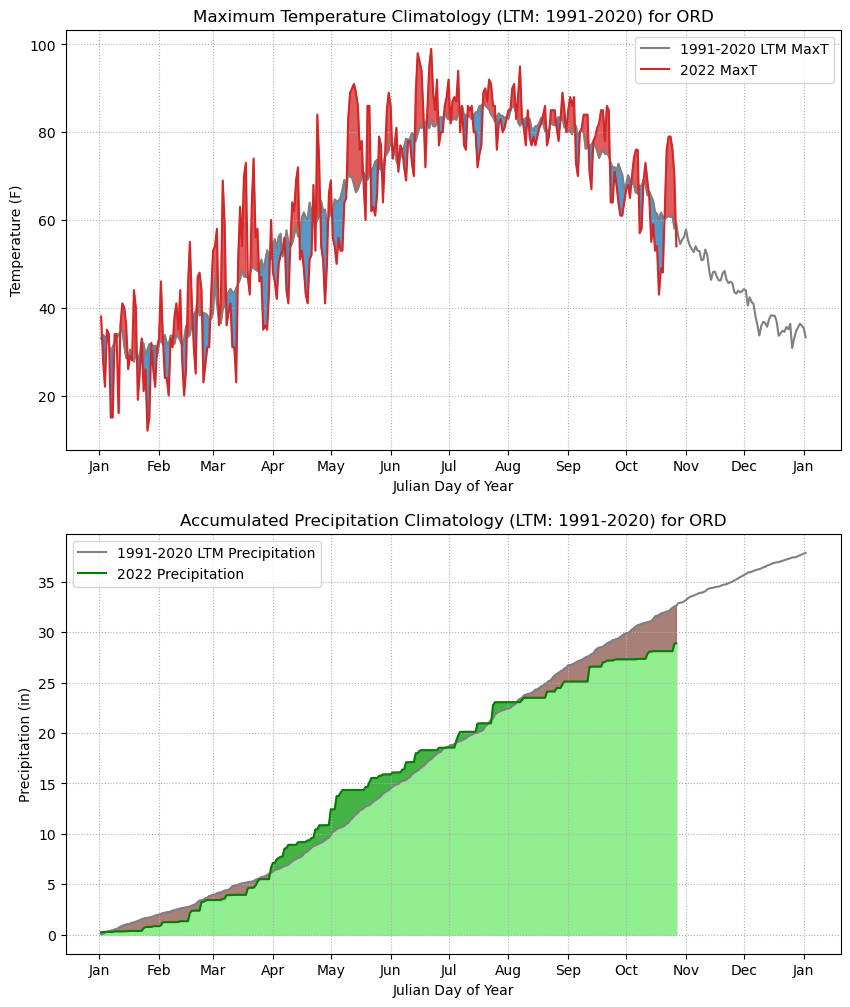

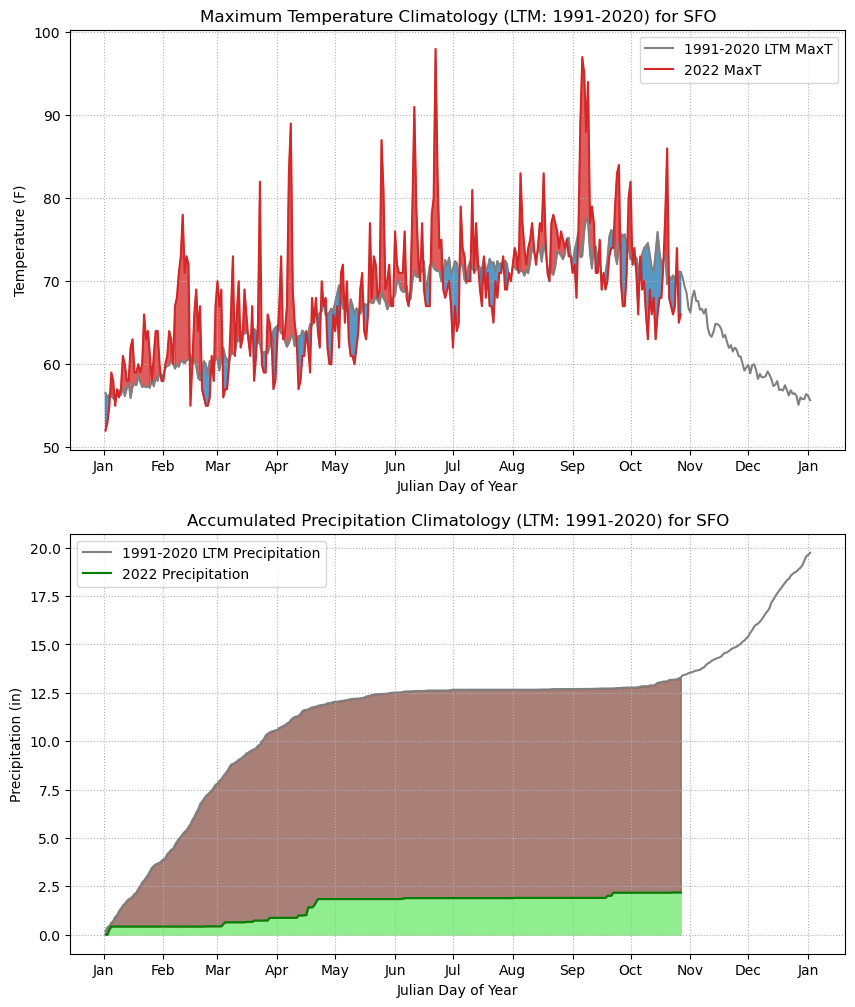

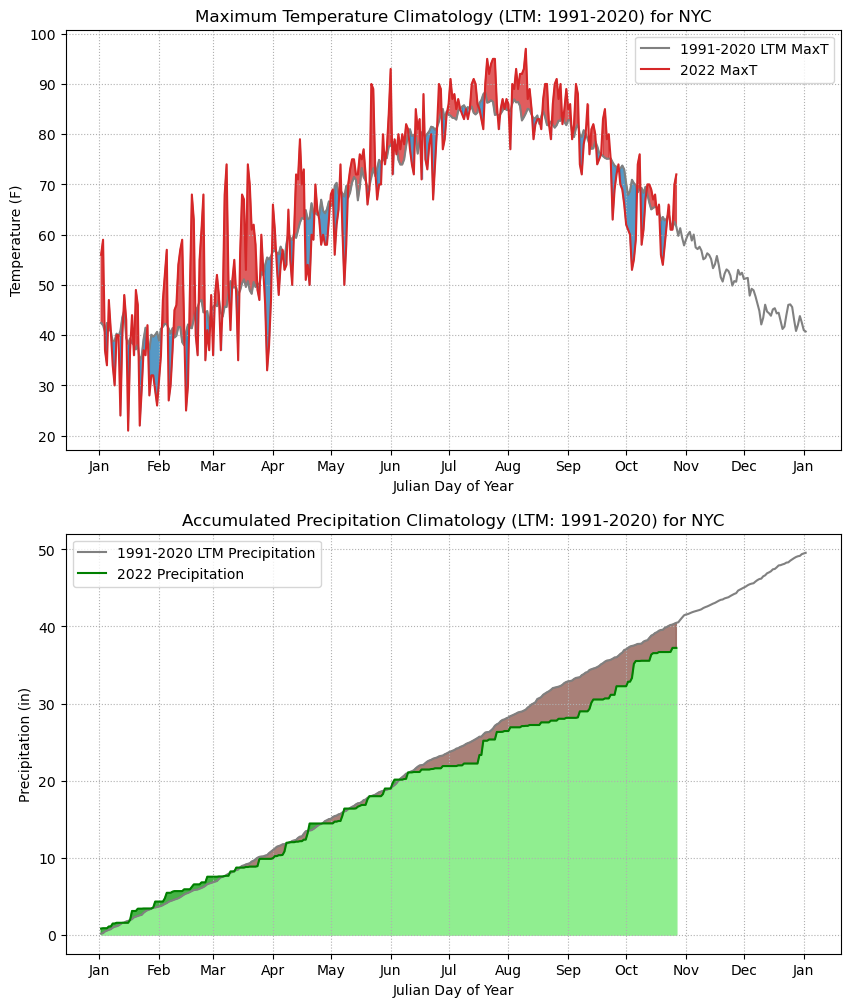

In [3]:
for station in ['ordthr', 'sfothr', 'nycthr']:
    climo_plot(station, 2022)

## Extra Credit (up to 10 points added to the assignments portion of the course)

Create a notebook that reads and plots some shapefile that we did not read and display as part of lecture. The extra credit received will be commensurate with the effort to make a high-quality image using your shapefile and any other data that is also plotted. Making a plot and displaying the output of a single shapefile with nothing else (other than geographic boundaries) will earn at most two points of extra credit. Be creative and thoughtful to earn additional points.

Natural Earth Webiste: https://www.naturalearthdata.com

NWS Shapefiles Data: https://www.weather.gov/gis/NWS_Shapefile

Census Data: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

Turn in a completed extra credit notebook, renamed as

`extracredit_<username>.ipynb`

with your `<username>` being your DataVU login name (e.g., mine is `kgoebber`) to `/archive/courses/met290/extracredit` via the Linux computing system.